### Description

Counts the ammount of relevance shifts between four possible cases:
- 1 to 0
- 1 to 1
- 0 to 0
- 0 to 1

among the groundtruth of different collections. Counts both per $top-k$ and per position.

---

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
import sys, os
sys.path.append('../')

import glob

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from rankutils.cfgloader import cfgloader

In [4]:
def count_shifts(shifts_arr):
        
    shifts_padded = np.pad(shifts_arr, pad_width=((0, 0), (6, 0)), mode='constant', constant_values=0)
    vals = np.packbits(shifts_padded)
    count = np.bincount(vals)
    
    return count

In [12]:
def count_per_positions(labels, k):
    
    # 1st to 2nd position is not counted
    # kth to (k+1)th position is not counted
    pos_counts = np.zeros((k, 4), dtype=np.int32)
    
    for i in range(0, k):
        
        shifts = labels[:, i:i+2]
        pos_counts[i] = count_shifts(shifts)
        
    return pos_counts

In [13]:
def draw_counts(counts, ax):
    
    n_pos = counts.shape[0]
    
    for i in range(n_pos):
        
            x = np.array([0, 0.5, 1.0, 1.5], dtype=np.float32) + i*3
            y = counts[i]
            w = 0.5
            
            h = ax.bar(x, y, width=w, bottom=0.0, align='edge', color=['red', 'blue', 'darkgreen', 'orange'], alpha=0.8)
            
    ax.set_xticks([(i*3) + 1 for i in range(n_pos)])
    ax.set_xticklabels(["{0:d} -> {1:d}".format(i, i+1) for i in range(1, n_pos+2)])
    
    ax.set_yticks(np.arange(0, 1.1, 0.1))
    
    ax.legend(h, ['0 to 0', '0 to 1', '1 to 0', '1 to 1'], fancybox=True, shadow=True, 
              loc='best', ncol=1, fontsize='large')

In [16]:
collection = 'places365'
order_nums = [1, 2, 3, 4]

k = 10

pathcfg = cfgloader('../path_2.cfg')

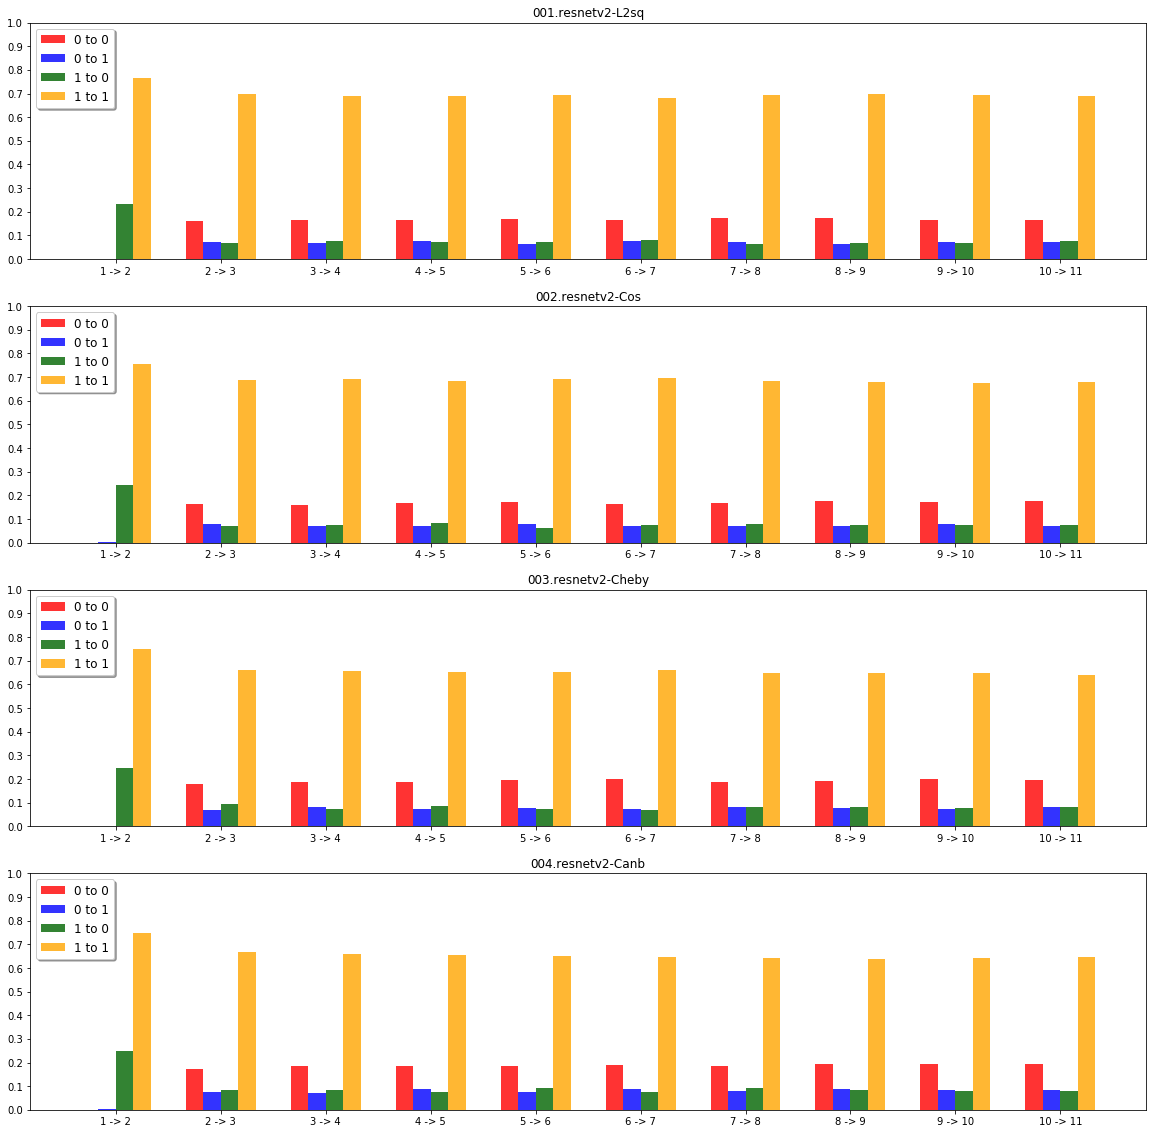

In [17]:
fig, axes = plt.subplots(len(order_nums))
axes = axes.reshape(-1)
fig.set_size_inches((20, 5*len(order_nums)))

for i in order_nums:
    key = "{0:s}_{1:03d}".format(collection, i)
    aux = "{0:s}*{1:s}*".format(pathcfg.get(key, 'label'), pathcfg.get(key, 'rktpdir'))
    gtlabels = np.load(glob.glob(aux)[0])
    counts = count_per_positions(gtlabels, k)
    
    draw_counts(counts/counts.sum(axis=1).reshape(-1, 1), ax=axes[i-1])
    
    axes[i-1].set_title(pathcfg.get(key, 'rktpdir'))